In [33]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)

In [34]:
houses = pd.read_pickle('homeDataCSV.pkl')

# GeoPlot

In [35]:
states = gpd.read_file('s_22mr22/s_22mr22.shp')
wa = states.loc[states.STATE=='WA']
counties = gpd.read_file('WA_County_Boundaries/WA_County_Boundaries.shp')
counties.to_crs(epsg=4326, inplace=True)

In [36]:
counties['coords'] = counties['geometry'].to_crs(epsg=4326).apply(lambda x: x.representative_point().coords[:])
counties['coords'] = [coords[0] for coords in counties['coords']] #.to_crs(epsg=4326)

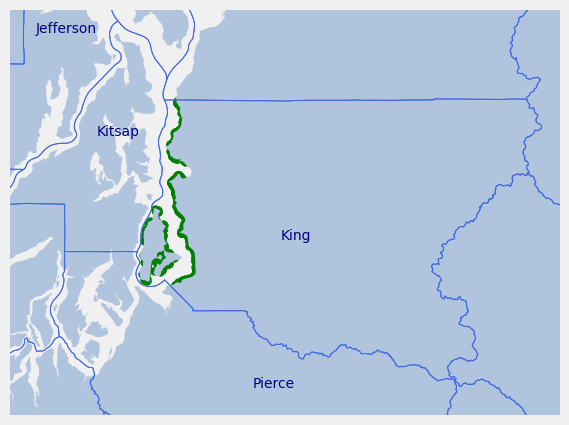

In [37]:
geometry = [Point(xy) for xy in zip(houses['long'], houses['lat'])]
gdf = GeoDataFrame(houses, geometry=geometry)   

#this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 5))#
gdf.plot(ax=ax, marker='o', color='g', markersize=30)
wa.to_crs(epsg=4326).plot(ax=ax,facecolor='lightsteelblue') #
counties.to_crs(epsg=4326).plot(ax=ax, facecolor="none", 
              edgecolor='royalblue', lw=0.7)
plt.xlim([-123,-121])
plt.ylim([47,48])
for idx, row in counties.iterrows():
    coords = row['geometry'].representative_point().coords[:][0]
    plt.annotate(row['JURISDIC_2'], xy=coords,
                 horizontalalignment='center',color='navy',fontsize=10)
ax.axis('off')
plt.show()

# Skewed Data

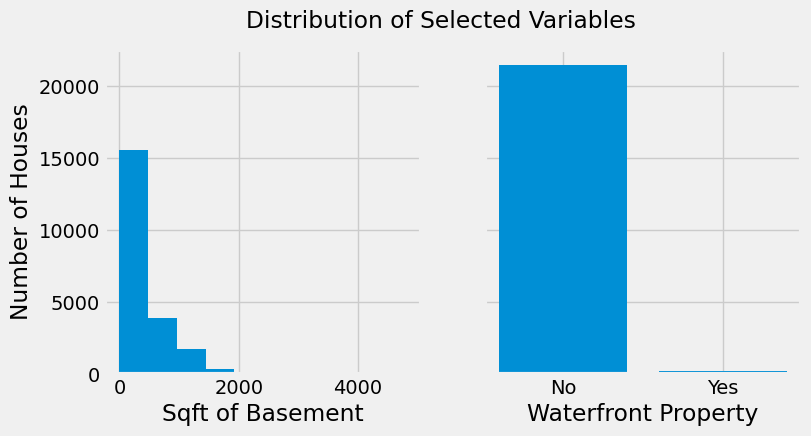

In [31]:
plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(8,4))
ax1 = plt.subplot(1, 2, 1)
plt.hist(houses.sqft_basement)
plt.xlabel('Sqft of Basement')
plt.ylabel('Number of Houses')
ax2 = plt.subplot(1, 2, 2)
houses['waterfront_yn'] = houses.waterfront.apply(lambda x: 'Yes' if x else 'No')
waterfront = dict(houses.waterfront_yn.value_counts())
plt.bar(waterfront.keys(),waterfront.values())
plt.xlabel('Waterfront Property')
plt.suptitle('Distribution of Selected Variables')
plt.show()